# Laboratory work 10
## Sunspot cycle reconstruction free from any constraints and assumptions  
## Group 1: Viktor Liviniuk, Alina Liviniuk
## Skoltech
## 2017

The objective of this laboratory work is to reconstruct a dynamical process using experimental data on the basis of methods that do not need any prior assumptions about the process. Important outcome of this exercise is getting skill to choose the most effective method in conditions of uncertainty.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Our data - monthly mean sunspot numbers (year, month, sunspot number):

In [2]:
data = np.loadtxt('Sunspot.txt')
time = data[:,0] + data[:,1] / 12;
sunspot = data[:,2]

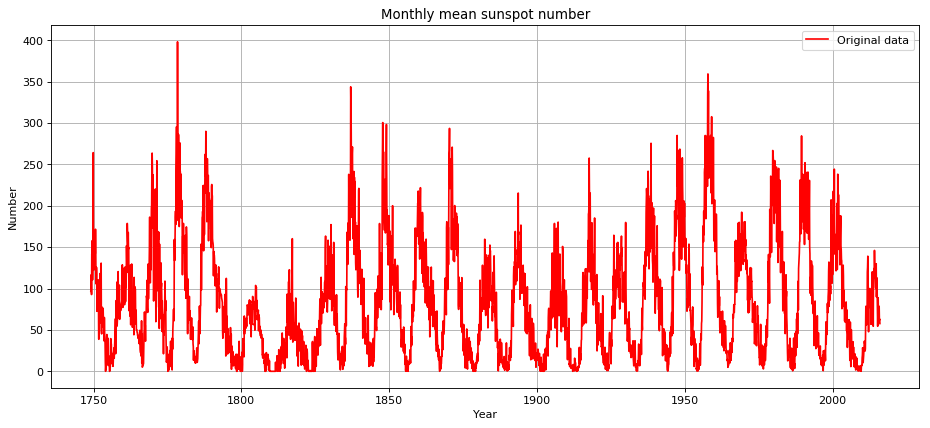

In [3]:
# Plot
plt.figure(figsize=(14, 6), dpi=80)
plt.plot(time, sunspot, 'r-', label='Original data')
plt.title('Monthly mean sunspot number')
plt.grid()
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number')
plt.show()

Now we produce 13-month Running Mean to optimize it later:

In [4]:
def running_mean_13(sunspot):
    # returns an array of smoothed sunspot array
    N = sunspot.size
    k = np.ones((13,1)) / 12
    k[0,0] = k[0,-1] = 1 / 24
    rmean = np.zeros(N)
    rmean[:6] = np.ones(6) * np.average(sunspot[:6])
    rmean[-6:] = np.average(sunspot[-6:])
    for i in range(6,N-6):
        rmean[i] = np.matmul(sunspot[i-6:i+7], k) 
    return rmean

In [5]:
rmean = running_mean_13(sunspot)

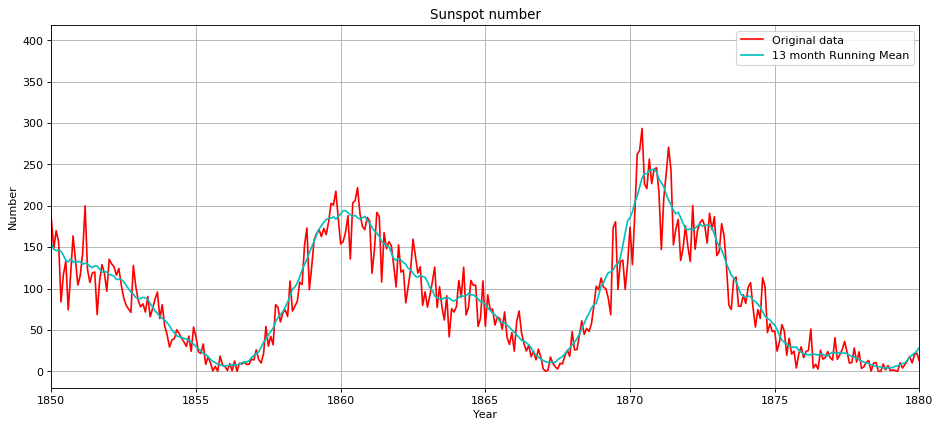

In [6]:
# Plot
plt.figure(figsize=(14, 6), dpi=80)
plt.plot(time, sunspot, 'r-', label='Original data')
plt.plot(time, rmean, 'c-', label='13 month Running Mean')
plt.title('Sunspot number')
plt.grid()
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number')
plt.xlim(1850, 1880)
plt.show()

Now let's develop 13-month <b>Optimal</b> Running Mean of monthly mean sunspot numbers.

In [7]:
b = 0.01

In [8]:
def optimal_running_mean_13(sunspot, b):
    # create matrix A
    A = np.zeros((13,13))
    for i in range(11):
        A[2+i,i] = A[i,2+i] = 1
    for i in range(10):
        A[2+i,1+i] = A[1+i,2+i] = -4
    A[1,0] = A[0,1] = A[-2,-1] = A[-1,-2] = -2
    for i in range(2, 11):
        A[i,i] = 6+b
    A[0,0] = A[-1,-1] = 1+b
    A[1,1] = A[-2,-2] = 5+b
    # run
    N = sunspot.size
    ormean = np.zeros(N)
    ormean[:6] = np.ones(6) * np.average(sunspot[:6])
    ormean[-6:] = np.average(sunspot[-6:])
    for i in range(6, N-6):
        ormean[i] = b * np.matmul(np.linalg.inv(A)[6,:], sunspot[i-6:i+7].reshape((13,1)))
    return ormean

In [9]:
ormean = optimal_running_mean_13(sunspot, b)

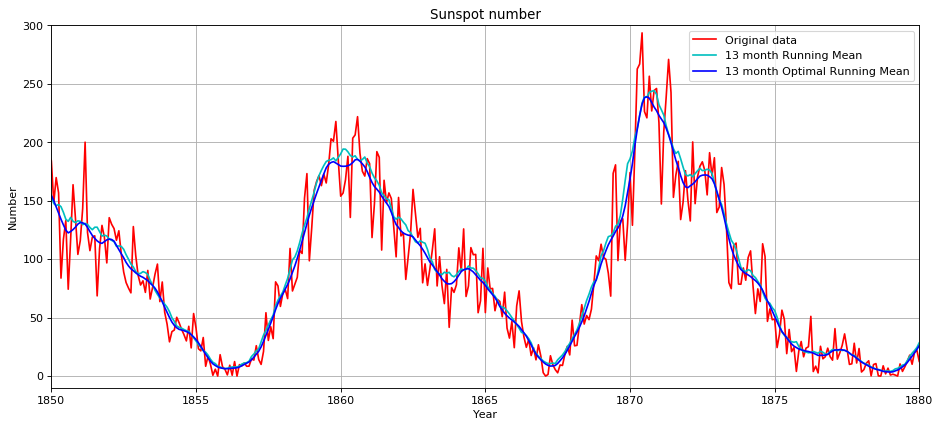

In [10]:
# Plot
plt.figure(figsize=(14, 6), dpi=80)
plt.plot(time, sunspot, 'r-', label='Original data')
plt.plot(time, rmean, 'c-', label='13 month Running Mean')
plt.plot(time, ormean, 'b-', label='13 month Optimal Running Mean')
plt.title('Sunspot number')
plt.grid()
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number')
plt.xlim(1850, 1880)
plt.ylim(-10, 300)
plt.show()

Note that Optimal method showed a double peak, while the regular method did NOT.

Now a comparison of deviation and variability indicators will be done.

In [11]:
def deviation_indicator(z, X):
    return np.sum((z-X)**2)

In [12]:
def variability_indicator(X):
    N = X.size
    indicator = 0
    for i in range(N-2):
        indicator += (X[i+2] - 2*X[i+1] + X[i])**2
    return indicator

In [17]:
dev = deviation_indicator(sunspot, rmean)
var = variability_indicator(rmean)
dev_opt = deviation_indicator(sunspot, ormean)
var_opt = variability_indicator(ormean)
indicators = [[dev, var, b*dev+var],[dev_opt, var_opt, b*dev_opt+var_opt]]

indicators = np.round(indicators, 2)
col = ['Deviation indicator', 'Variability indicator','J = b * D_ind + V_ind']
ind = ['13 month Running Mean','13 month Optimal Running Mean']
table = pd.DataFrame(data=indicators, index=ind, columns=col, dtype=None, copy=False)
table.head(2)

,Deviation indicator,Variability indicator,J = b * D_ind + V_ind
13 month Running Mean,1600583.23,24106.59,40112.43
13 month Optimal Running Mean,1318509.43,4043.70,17228.80


Both indicators, as well as optimality criterion J are lower (better) for optimal running mean.

Analysis of 13-month optimal running mean produce inverse oscillations:

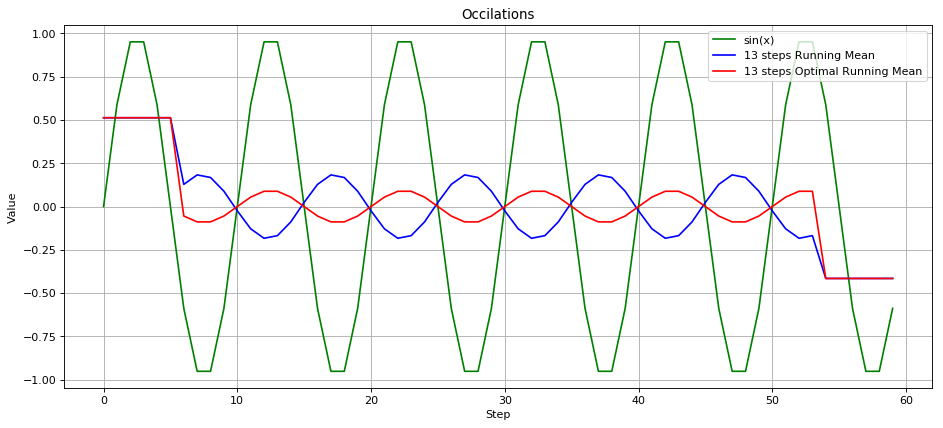

In [14]:
T=10     # Period of sin(x)
N=6     # Number of periods
l = N * T 
step = np.array(range(l))
x = np.sin(2*np.pi*step/T)
x_rmean = running_mean_13(x)
x_ormean = optimal_running_mean_13(x, b)
# Plot
plt.figure(figsize=(14, 6), dpi=80)
plt.plot(step, x, 'g-', label='sin(x)')
plt.plot(step, x_rmean, 'b-', label='13 steps Running Mean')
plt.plot(step, x_ormean, 'r-', label='13 steps Optimal Running Mean')
plt.title('Occilations')
plt.grid()
plt.legend()
plt.xlabel('Step')
plt.ylabel('Value')
plt.show()

For T=10 Running Mean produses inverse occilations. Optimization of Running Mean deals with this problem - this method is highly unlikely to produce inverse occilations. 

## Conclusion
13-month Optimal Running mean gives better results, that a usual 13-month Running Mean. It was shows visually, that it approximates better in local peaks and minimums. Also the overal look of the line is better - it is more smooth and closer to measurements at the same time. The optimal running mean doesn’t distort the short-term variations of sunspot number. <br>
Deviation and variability indicator, as well as optimality criterion J are lower for the optimal method, which confirms that it worked better.<br>
This is a reconstruction of a process free from any assumptions.
Optimal Running Mean deals with occilations better, than the regular Running Mean. It is unlikely to produce inverse occilations.